# Autoencoder

<span style="float:right">(Si no tienes GPU puedes [ejecutar este notebook en COLAB](https://colab.research.google.com/github/AlbertoRuiz/umucv/blob/master/notebooks/bottleneck.ipynb))</span>

## Load MNIST data

In [1]:
# quitamos mensajes de tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}

In [2]:
import matplotlib.pyplot as plt
import numpy             as np
from tensorflow.keras.datasets import mnist

(kxl,cl), (kxt,ct) = mnist.load_data()

xl = kxl.reshape(len(kxl),-1)/255
xt = kxt.reshape(len(kxt),-1)/255
print(xl.shape, cl.shape)
print(xt.shape, ct.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Softmax, Flatten, GaussianNoise
from tensorflow.keras.utils import plot_model

## 2D embedding

In [4]:
model = Sequential()
model.add(keras.Input(shape=(28*28,)))
for u in [256, 128, 64, 32, 2, 32, 64, 128, 256]:
    model.add(keras.layers.Dense(units=u, activation='relu' if u!=2 else 'sigmoid'))
model.add(keras.layers.Dense(units=28*28, activation='linear'))
model.compile(loss='mse', optimizer='adam')

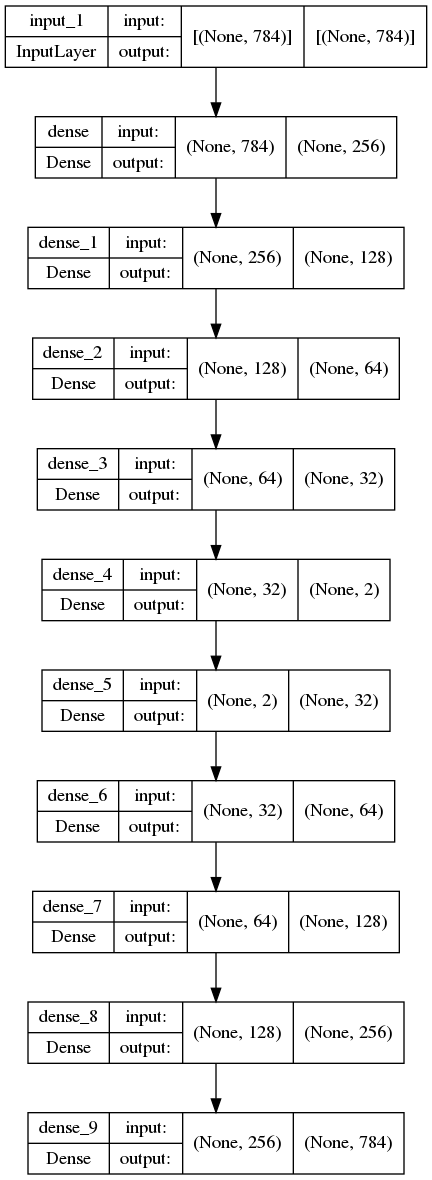

In [5]:
plot_model(model, show_shapes=True)

In [6]:
model.fit(xl, xl, epochs=100, batch_size=500, verbose=1)

Epoch 1/100
120/120 [==============================] - 4s 28ms/step - loss: 0.0688
Epoch 2/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0588
Epoch 3/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0543
Epoch 4/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0515
Epoch 5/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0484
Epoch 6/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0463
Epoch 7/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0450
Epoch 8/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0441
Epoch 9/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0433
Epoch 10/100
120/120 [==============================] - 3s 24ms/step - loss: 0.0427
Epoch 11/100
120/120 [==============================] - 4s 29ms/step - loss: 0.0421
Epoch 12/100
120/120 [==============================] - 4s 35ms/step - loss: 0.0417
E

In [7]:
pred = model.predict(xl)

In [8]:
def shdig(v):
    x = np.reshape(v,[28,28])
    plt.imshow(1-x, 'gray', vmin=0, vmax=1, interpolation="nearest");

def compare(k):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1); shdig(xl[k])
    plt.subplot(1,2,2); shdig(pred[k])

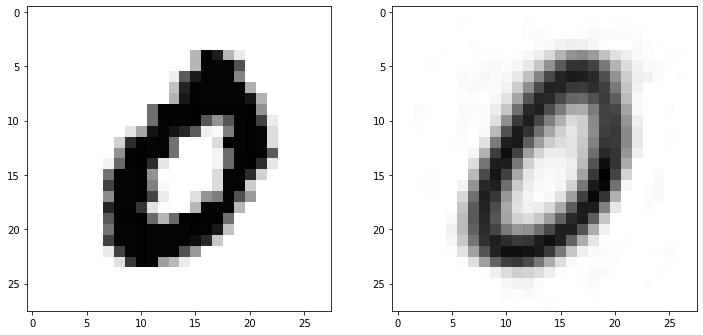

In [9]:
compare(37)

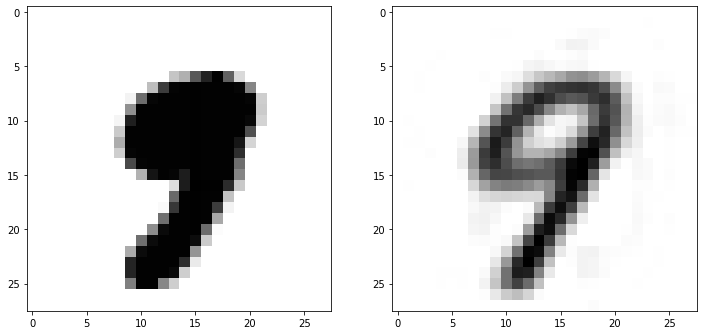

In [10]:
compare(10235)

In [11]:
encoder = keras.Sequential()
encoder.add(keras.Input(shape=(28*28,)))
for x in model.layers[:5]:
    encoder.add(x)
    
decoder = keras.Sequential()
decoder.add(keras.Input(shape=(2,)))
for x in model.layers[5:]:
    decoder.add(x)

In [12]:
xy = encoder.predict(xl)

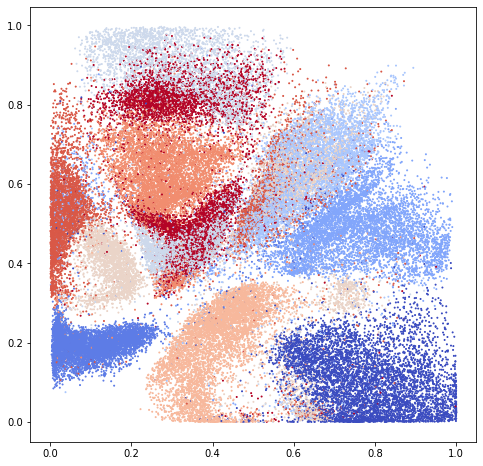

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(*xy.T,s=1,c=cl,cmap='coolwarm');

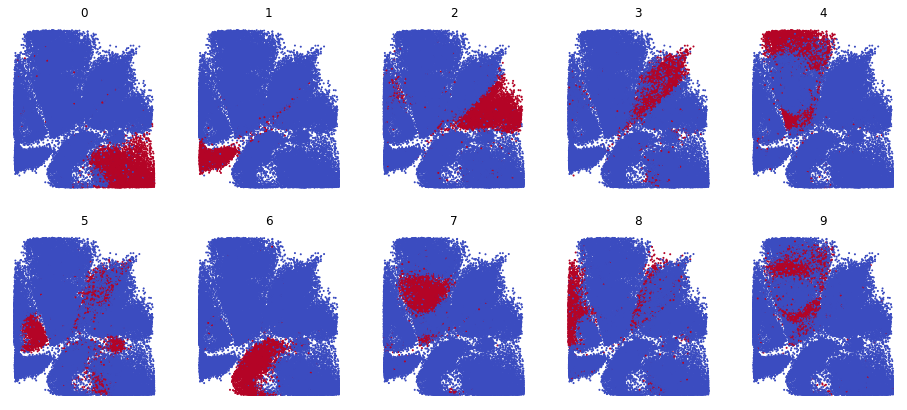

In [14]:
ns = 1
plt.figure(figsize=(16,7))
for d in range(10):
    plt.subplot(2,5,ns)
    ns += 1
    plt.scatter(*xy.T,s=1,c=cl==d,cmap='coolwarm');
    plt.title(d)
    plt.axis('off')

## 3D embedding

In [15]:
encoder = Sequential()
encoder.add(keras.Input(shape=(28*28,)))
for u in [256, 128, 64, 32]:
    encoder.add(keras.layers.Dense(units=u, activation='relu'))
encoder.add(keras.layers.Dense(units=3, activation='sigmoid'))

decoder = Sequential()
decoder.add(keras.Input(shape=(3,)))
for u in [32, 64, 128, 256]:
    decoder.add(keras.layers.Dense(units=u, activation='relu'))
decoder.add(keras.layers.Dense(units=28*28, activation='linear'))

model = Sequential([encoder, decoder])
model.compile(loss='mse', optimizer='adam')

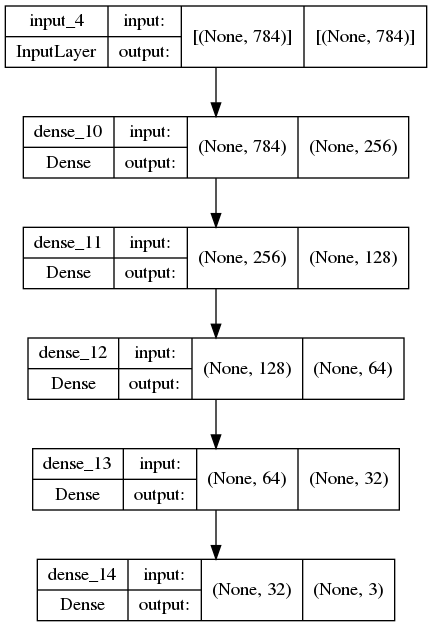

In [16]:
plot_model(encoder, show_shapes=True, expand_nested=True)

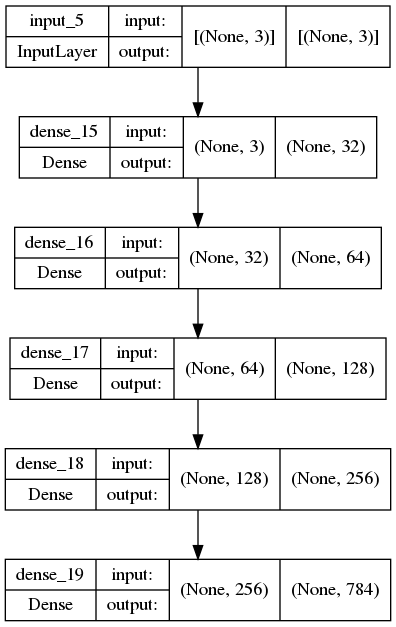

In [17]:
plot_model(decoder, show_shapes=True, expand_nested=True)

In [18]:
model.fit(xl, xl, epochs=100, batch_size=500, verbose=1)

Epoch 1/100
120/120 [==============================] - 3s 22ms/step - loss: 0.0685
Epoch 2/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0564
Epoch 3/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0473
Epoch 4/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0431
Epoch 5/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0407
Epoch 6/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0394
Epoch 7/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0383
Epoch 8/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0375
Epoch 9/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0367
Epoch 10/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0362
Epoch 11/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0357
Epoch 12/100
120/120 [==============================] - 3s 23ms/step - loss: 0.0353
E

In [19]:
xyz = encoder.predict(xl)

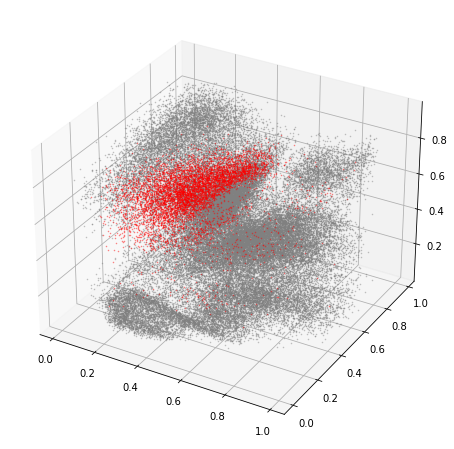

In [20]:
showclass = 3

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot(*xyz[cl!=showclass].T,'.',markersize=1,alpha=0.5,color='gray');
ax.plot(*xyz[cl==showclass].T,'.',markersize=1,alpha=0.5,color='red');

#ax.scatter(*map.T,s=0.1,c=cl==0,cmap='coolwarm',alpha=0.5);


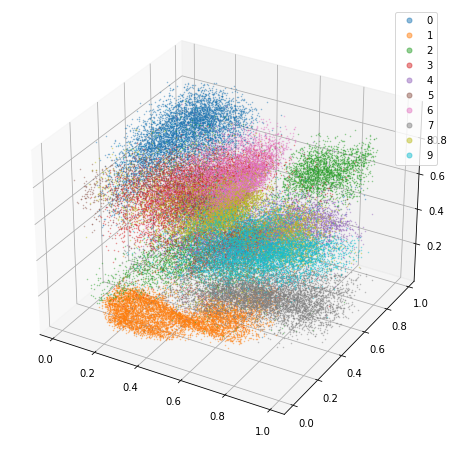

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for c in range(10):
    ax.plot(*xyz[cl==c].T,'.',markersize=1,alpha=0.5,label=c);
plt.legend(markerscale=10);

Si estás en tu máquina local puedes visualizar dinámicamente el gráfico 3D con el backend tk de matplotlib:

In [22]:
%matplotlib tk

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for c in range(10):
    ax.plot(*xyz[cl==c].T,'.',markersize=1,alpha=0.5,label=c);
plt.legend(markerscale=10);

Volvemos al los gráficos inline:

In [24]:
%matplotlib inline

In [25]:
from ipywidgets import interactive, FloatSlider

def fun(a=0.5,b=0.5,c=0.5):
    shdig(decoder.predict([[a,b,c]]));

interactive(fun, a=(0.,1,0.01), b=(0.,1,0.01), c=(0.,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, step=0.01), FloatSlider(value=0.5, desc…